## Wine analysis 🍷 

### Load data from wine.data.csv file.

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import re

# from sklearn.decomposition import PCA as sklearnPCA

wines = pd.read_csv('wine.data.csv', header=0)
wines

Label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280  Proline  
0               5.64  1.04   3.92     1065  
1               4.38  1.05   3.40     1050  
2               5.68  1.03   3.17     1185  
3               7.80  0.86   3.45     1480  
4               4.32  1.04   2.93      735  
..               ...   ...    ...      ...  
173             7.70  0.64   1.74      740  
174             7.30  0.70   1.56      750  
175            10.20  0.59   1.56      835  
176             9.30  0.60   1.62      840  
177             9.20  0.61   1.60      560  

[178 rows x 14 columns]

### Keep 1st column into a separate variable (label) and remove it from DataFrame.

In [83]:
label = wines['Label']
wines = wines.drop(['Label'], axis=1)
wines

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

In [84]:
label

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Label, Length: 178, dtype: int64

## Use Scatter plot to learn attributes of data

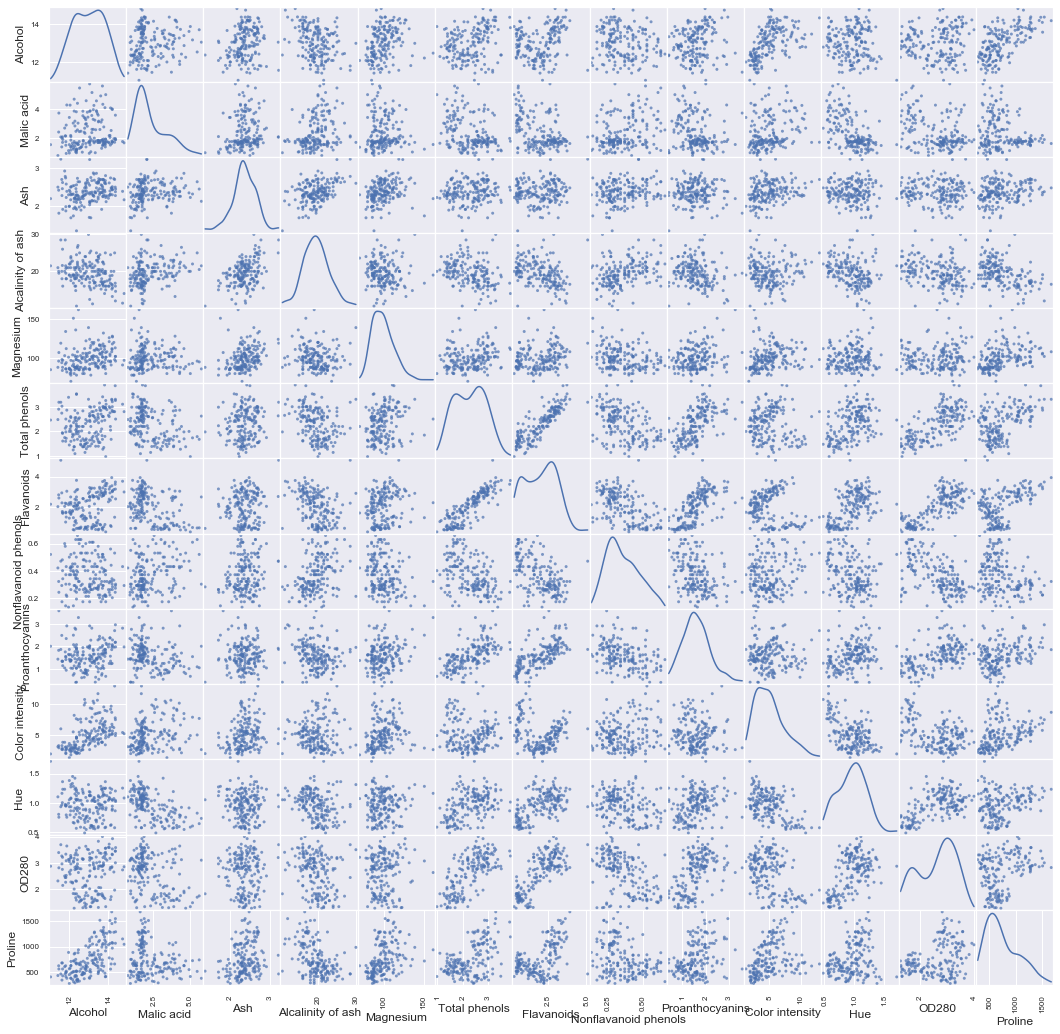

In [85]:
from pandas.plotting import scatter_matrix as sm
sm(wines, alpha = 0.7, figsize=(18,18), diagonal='kde')
plt.show()

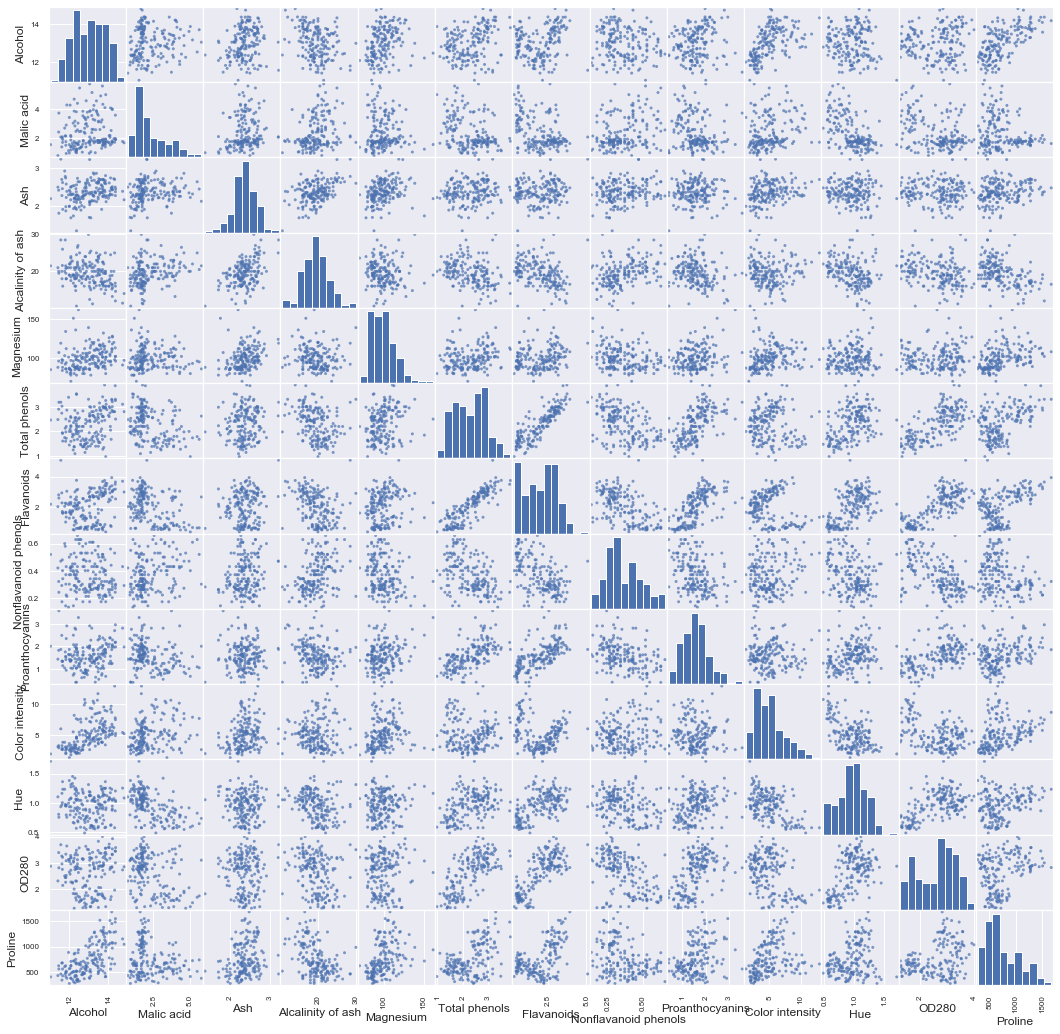

In [86]:
sm(wines, alpha = 0.7, figsize=(18,18), diagonal='hist')
plt.show()

### It looks as though flavanoids and total phenols have strong + correlations and that flavanoids in general have the strongest + correlations with other attributes of the wines. There are definitely a variety of attributes that are related to each other, while there's an equal amount of attributes that don't have any visible relationship

## Visualize data with correlation heatmap

[]

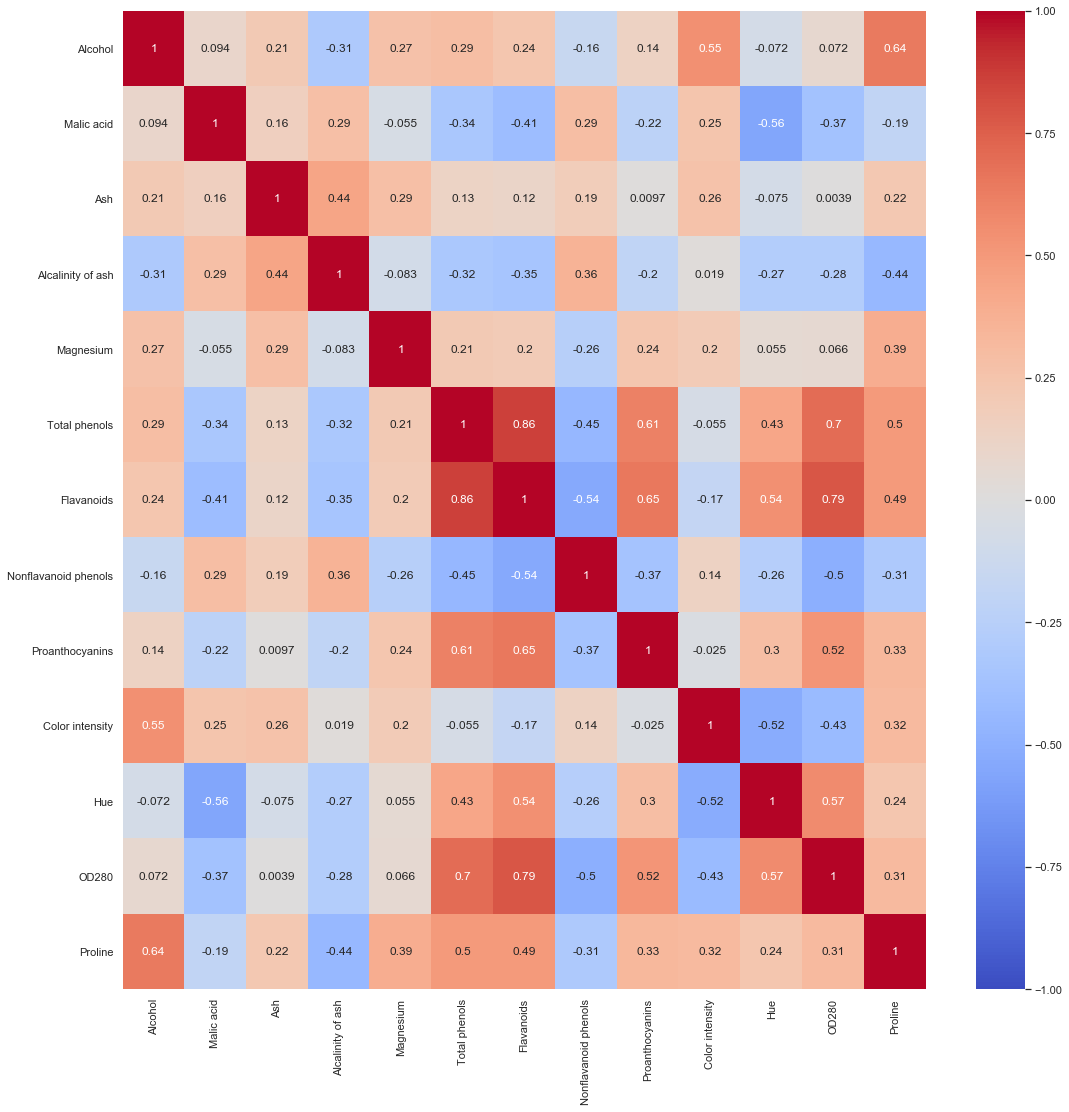

In [94]:
seaborn.set()

plt.subplots(figsize=(18,18))
ax = seaborn.heatmap(wines.corr(), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

ax.plot()


### Some attributes with large correlation:
    - Flavonoids <-> OD280
    - Total phenols <-> OD280
    - Total phenols <-> Flavonoids
    - Proline <-> Alochol
    - Malic Acid <-> Hue
    - Total phenols <-> Proanthocyanins
    - and others

This heatmap can be used to quickly identify strong positive and negative correlations by looking for darker reds and blues respectively.

## Normalize data by removing the mean and scaling to unit variance using preprocessing.StandardScaler

In [59]:
import sklearn.preprocessing as preprocessing
standardScaler = preprocessing.StandardScaler()
standardScaler.fit(wines)
X_scaled_array = standardScaler.transform(wines)
normalizedData = pd.DataFrame(X_scaled_array, columns = wines.columns)

normalizedData.head()
wines.head()

Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   Color intensity       Hue     OD280   Proline  
0         0.251717  0.362177  1.847920  1.013009  
1        -0.293321  0.406051  1.113449  0.965242  
2         0.269020  0.318304  0.788587  1.395148  
3         1.186068 -0.427544  1.184071  2.334574  
4        -0.319276  0.362177  0.449601 -0.037874

## Use kMeans to cluster the normalized data using elbow method , the number of clusters should be 3. Use pairplot to visualize the wine attributes with their cluster. 

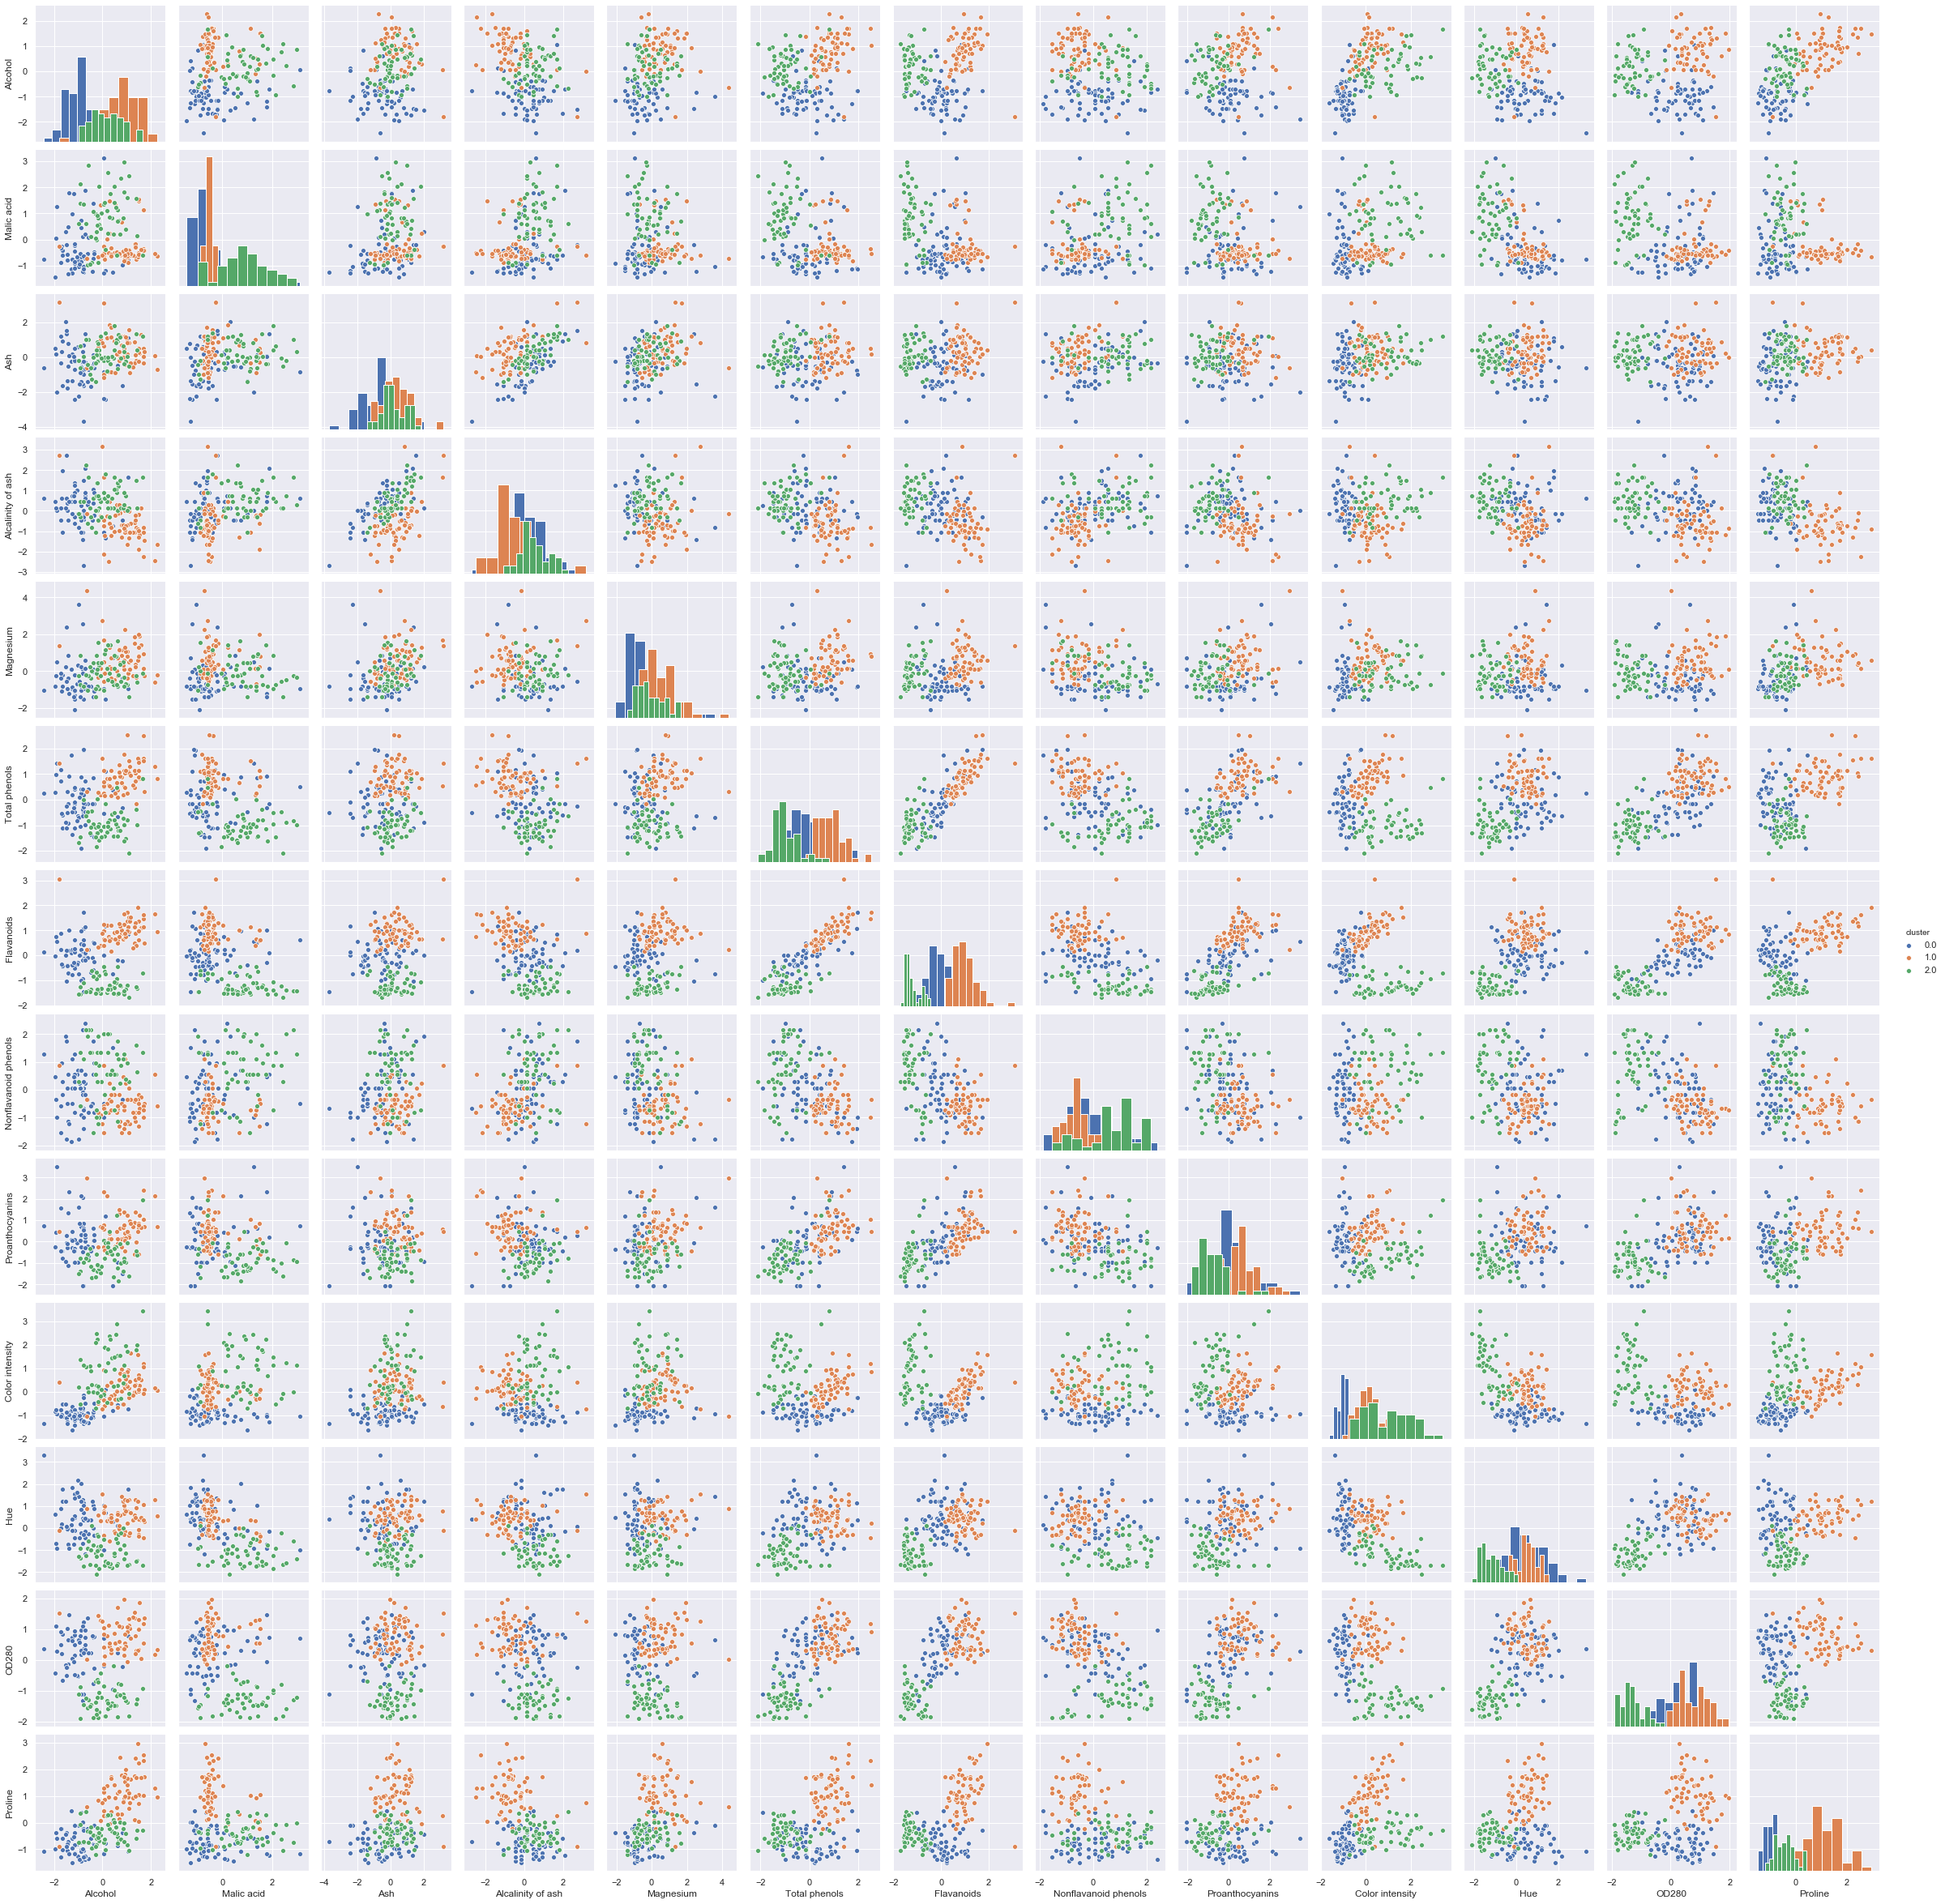

In [140]:
from sklearn.cluster import KMeans
from datetime import datetime

seed = 123456

kMeansClustering = KMeans(n_clusters = 3, random_state=seed)
res = kMeansClustering.fit_predict(normalizedData)

normalizedData["cluster"] = res.astype('float64')
sns_plot = seaborn.pairplot(normalizedData, hue = "cluster",diag_kind="hist")

In [144]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
transformed = pca.fit_transform(normalizedData)

In [145]:
# See that these first 6 principal components explain 85% of variance
sum(pca.explained_variance_ratio_)

0.8500229716048849

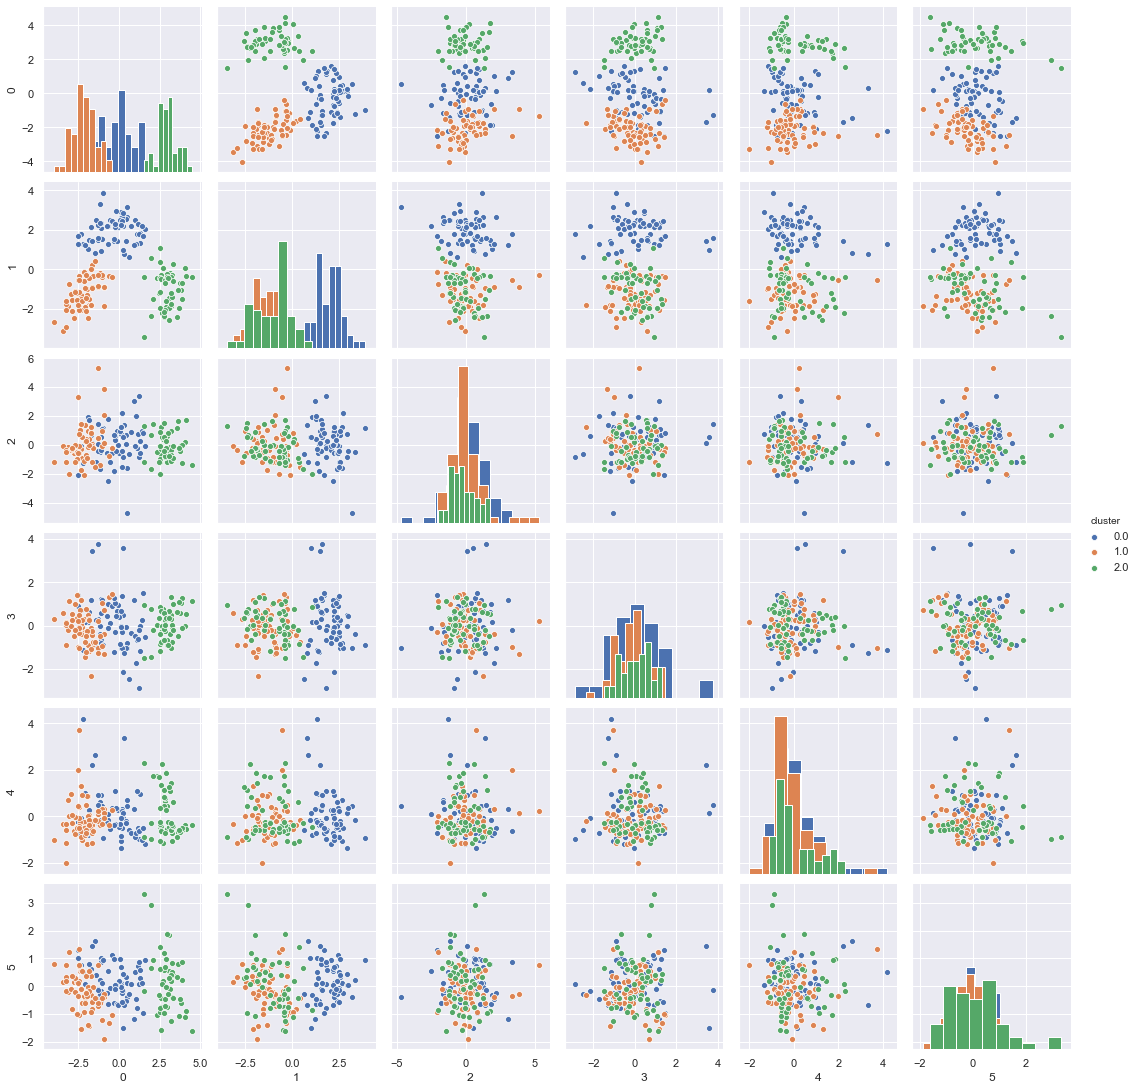

In [161]:
seed = 123456

kMeansClustering = KMeans(n_clusters = 3, random_state=seed)
res = kMeansClustering.fit_predict(transformed)

# Turn into dataframe
transformed_df = pd.DataFrame(data=transformed[0:])

transformed_df["cluster"] = res.astype('float64')

sns_plot = seaborn.pairplot(transformed_df, hue = "cluster",diag_kind="hist")

# Clusters after dimensionality reduction

## Use adjusted_rand_score in sklearn.metrics.cluster to calculate the scores of original kMeans and kMeans after PCA. What is your conclusion?

### Score of clustered data after dimensionality reduction

In [176]:
from sklearn.metrics.cluster import adjusted_rand_score
print("Score of clustered data without dimensionality reduction...")
print(adjusted_rand_score(label, normalizedData["cluster"]))

print("Score of clustered data with dimensionality reduction...")
print(adjusted_rand_score(label, transformed_df["cluster"]))

Score of clustered data without dimensionality reduction...
0.8974949815093207
Score of clustered data with dimensionality reduction...
0.8974949815093207


### From these scores we can conclude that the dimensionality reduction was achievable with no loss of prediction accuracy 🏁 🏁 🏁 

